#### Training a network for audio classification - Using Urban8K dataset
Written by : leopauly | cnlp@leeds.ac.uk

### Method 1

In [ ]:
import wave
import pandas as pd
import numpy as np
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
import pylab
import pickle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [14]:
## Dataset parameters
work_dir = "/nobackup/leopauly/UrbanSound8K/audio"
classes={
'0':'air_conditioner',
'1':'car_horn',
'2':'children_playing',
'3':'dog_bark',
'4':'drilling',
'5':'engine_idling',
'6':'gun_shot',
'7':'jackhammer',
'8':'siren',
'9':'street_music'
}

## Network parameters
data_w = 40
data_h = 40
n_classes = 10
n_filters_1 = 32
n_filters_2 = 64
d_filter = 3
p_drop_1 = 0.25
p_drop_2 = 0.50

## Train- Test
p_train = 0.8
batch_size = 32
nb_epoch = 500

In [38]:
train = pd.read_csv('/nobackup/leopauly/S2LStage2/train.csv')
features = pd.read_pickle("/nobackup/leopauly/S2LStage2/features_train.pkl")
train = train.assign(features=features.values)

y = np.array(train.loc[:, 'Class'])
lb = LabelEncoder()
y = np_utils.to_categorical(lb.fit_transform(y))

X = np.array(train.loc[:, 'features'])
X = np.vstack(X)

print('Labels Shape:', y.shape) # Toral number of output labels
print('Features Shape',X.shape) # Total number 0f input vari

(5435, 1)
(5435,)
(5435, 217)
Labels Shape: (5435, 10)
Features Shape (5435, 217)


Class: siren
8 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


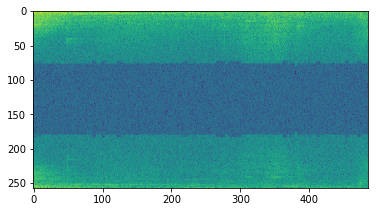

In [16]:
check=343
plt.imshow(features[check])
print('Class:', classes[str(labels[check])])
print(labels[check],y[check])
plt.show()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size=0.33, random_state=2)
                                                    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Fix for Keras
Y_train = Y_train.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
## Defining model
model = Sequential()

## NET MODEL 0:
#
# INPUT -> [CONV -> RELU -> CONV -> RELU -> POLL] ->
# -> [CONV -> RELU -> CONV -> RELU -> POLL] -> FC -> RELU -> FC
#
# - IMPLEMENTED METHOD-

# First layer
model.add(Convolution2D(n_filters_1, d_filter, d_filter, border_mode='valid', input_shape=(data_w, data_h, 3)))
model.add(Activation('relu'))

# Second layer
model.add(Convolution2D(n_filters_1, d_filter, d_filter))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Drop layer
model.add(Dropout(p_drop_1))

# Third layer
model.add(Convolution2D(n_filters_2, d_filter, d_filter, border_mode='valid'))
model.add(Activation('relu'))

# Fouth layer
model.add(Convolution2D(n_filters_2, d_filter, d_filter))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Drop layer
model.add(Dropout(p_drop_1))

## Used to flat the input (1, 10, 2, 2) -> (1, 40)
model.add(Flatten())

# Full Connected layer
model.add(Dense(256))
model.add(Activation('relu'))
# Drop layer
model.add(Dropout(p_drop_2))

# Output Full Connected layer
model.add(Dense(n_classes))
model.add(Activation('softmax'))

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=batch_size,nb_epoch=nb_epoch,validation_data=(X_test, Y_test),shuffle=True)

In [ ]:
## Evaluation

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
## Saving model

model_json = model.to_json()
with open("audioclassifier_0.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("audioclassifier_0.h5")
print("Saved model to disk")

### Method 2

In [1]:
## AUDIO DATA PROCESSING
import os
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
import h5py

Using TensorFlow backend.


In [2]:
## GET DATA TO WORK ON
print("Start loading data")

#features=pd.read_pickle("/nobackup/leopauly/S2LStage2/data_x_librosa.pkl")

fd = open("/nobackup/leopauly/S2LStage2/data_x_librosa.pkl", "rb")
fd2 = open("/nobackup/leopauly/S2LStage2/data_y_librosa.pkl", "rb")
features = pickle.load(fd,encoding='bytes')
labels = pickle.load(fd2)

print("Data loaded")

Start loading data
Data loaded


In [3]:
data = h5py.File("/nobackup/leopauly/S2LStage2/audio_data_test.h5", 'r')

In [4]:
data.keys()

KeysView(<HDF5 file "audio_data_test.h5" (mode r)>)

In [5]:
features_=data.get('features')

In [6]:
labels_=data.get('labels')

In [7]:
import matplotlib.pyplot as plt

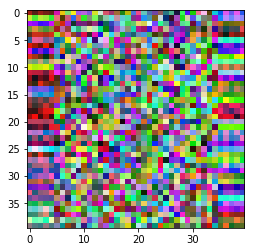

In [9]:
plt.imshow(features_[1])
plt.show()

In [12]:
features_.shape

(10679, 40, 40, 3)